In [1]:
import numpy as np 
import pandas as pd


# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()
# Maths
import math

# Set the options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
#Reading my file
df2=pd.read_csv('new_strike.csv')
df2.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,EFFECT,SPECIES_ID,SPECIES,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_STRUCK,SIZE,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,LUPDATE,SEASON
0,0,1990-10-15,10,1990,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,17R,IN,AGL,PRIVATELY OWNED,N477HA,1.0,C-172,226,7,A,1.0,A,1.0,7.0,2.746273,Approach,200.0,70.0,0.0,No Cloud,None,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,UNKBS,Unknown bird - small,False,False,No,1,Small,OPER = CHARLES WEATHERLY /Legacy Record=100033/,REDACTED,REDACTED,FAA Form 5200-7,04/12/1998,Autumn
1,1,1993-08-01,8,1993,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,LA,ASW,TRANS WORLD AIRLINES,N477HA,1.0,B-727,148,94,A,4.0,D,3.0,5.0,6.000000,Landing Roll,0.0,140.0,0.0,No Cloud,None,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,UNKBM,Unknown bird - medium,False,False,Unknown,1,Medium,/Legacy Record=100034/,REDACTED,REDACTED,AC Incident Rept,24/05/2005,Summer
2,2,1996-08-18,8,1996,Day,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,IL,AGL,UNITED AIRLINES,N477HA,1228.0,B-757-200,148,26,A,4.0,D,2.0,1.0,1.000000,Landing Roll,0.0,140.0,0.0,No Cloud,None,False,False,N,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,ZT1,Blackbirds,False,False,Unknown,1,Small,/Legacy Record=100035/,REDACTED,REDACTED,Air Transport Report,20/12/2007,Summer
3,3,1993-09-19,9,1993,Day,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,NH,ANE,PRIVATELY OWNED,N19CT,1.0,BE-33,123,6,A,1.0,A,1.0,7.0,2.746273,Approach,1800.0,150.0,8.0,No Cloud,None,False,True,S,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Precautionary Landing,UNKBL,Unknown bird - large,False,False,No,1,Large,SOURCE = 5200-7 & NON-COM INCIDENT REPT.OPERAT...,REDACTED,REDACTED,Multiple,11/05/1998,Autumn
4,4,1991-03-23,3,1991,Night,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,TX,ASW,AMERICAN AIRLINES,N887AA,1.0,B-727,148,94,A,4.0,D,3.0,5.0,6.000000,Approach,200.0,135.0,0.0,No Cloud,None,False,False,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,None,UNKBS,Unknown bird - small,False,False,No,1,Small,/Legacy Record=100037/,REDACTED,REDACTED,FAA Form 5200-7,28/05/1998,Spring


In [3]:
#Droping irrelevant columns,columns with a percentage of missing values more than 80%
df2.drop(['Unnamed: 0','AIRPORT_ID','AIRPORT','OPERATOR','STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD',
         'STR_NOSE', 'DAM_NOSE', 'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2',
        'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4',
        'DAM_ENG4', 'ING_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT',
       'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL',
       'DAM_TAIL', 'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER',
        'REPORTED_TITLE', 'SOURCE', 'LUPDATE', 'COMMENTS'],axis=1,inplace=True)

In [4]:
df2.drop(['INCIDENT_DATE','RUNWAY','REG','FLT','AMA','AMO', 'AC_CLASS', 'AC_MASS','ENG_1_POS', 'ENG_2_POS',
          'SPECIES','REMAINS_COLLECTED','REMAINS_SENT','NUM_STRUCK','REPORTED_NAME','INGESTED'],axis=1,inplace=True)

In [5]:
df2.drop(['PRECIPITATION','DISTANCE','STATE','TYPE_ENG'],axis=1,inplace=True)

In [6]:
df2.drop(['AIRCRAFT','HEIGHT'],axis=1,inplace=True)

In [22]:
df2['INDICATED_DAMAGE']=df2['INDICATED_DAMAGE'].replace(False,'No damage')

In [23]:
df2['INDICATED_DAMAGE']=df2['INDICATED_DAMAGE'].replace(True,'Caused damage')

In [8]:
H=df2.corr()
H

,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,NUM_ENGS,SPEED
INCIDENT_MONTH,1.000000,-0.038095,0.032002,0.038565,0.001662,0.020005
INCIDENT_YEAR,-0.038095,1.000000,-0.016040,0.008870,-0.122048,0.015616
LATITUDE,0.032002,-0.016040,1.000000,-0.034121,-0.016876,-0.014271
LONGITUDE,0.038565,0.008870,-0.034121,1.000000,0.084005,0.038545
NUM_ENGS,0.001662,-0.122048,-0.016876,0.084005,1.000000,0.198808
SPEED,0.020005,0.015616,-0.014271,0.038545,0.198808,1.000000


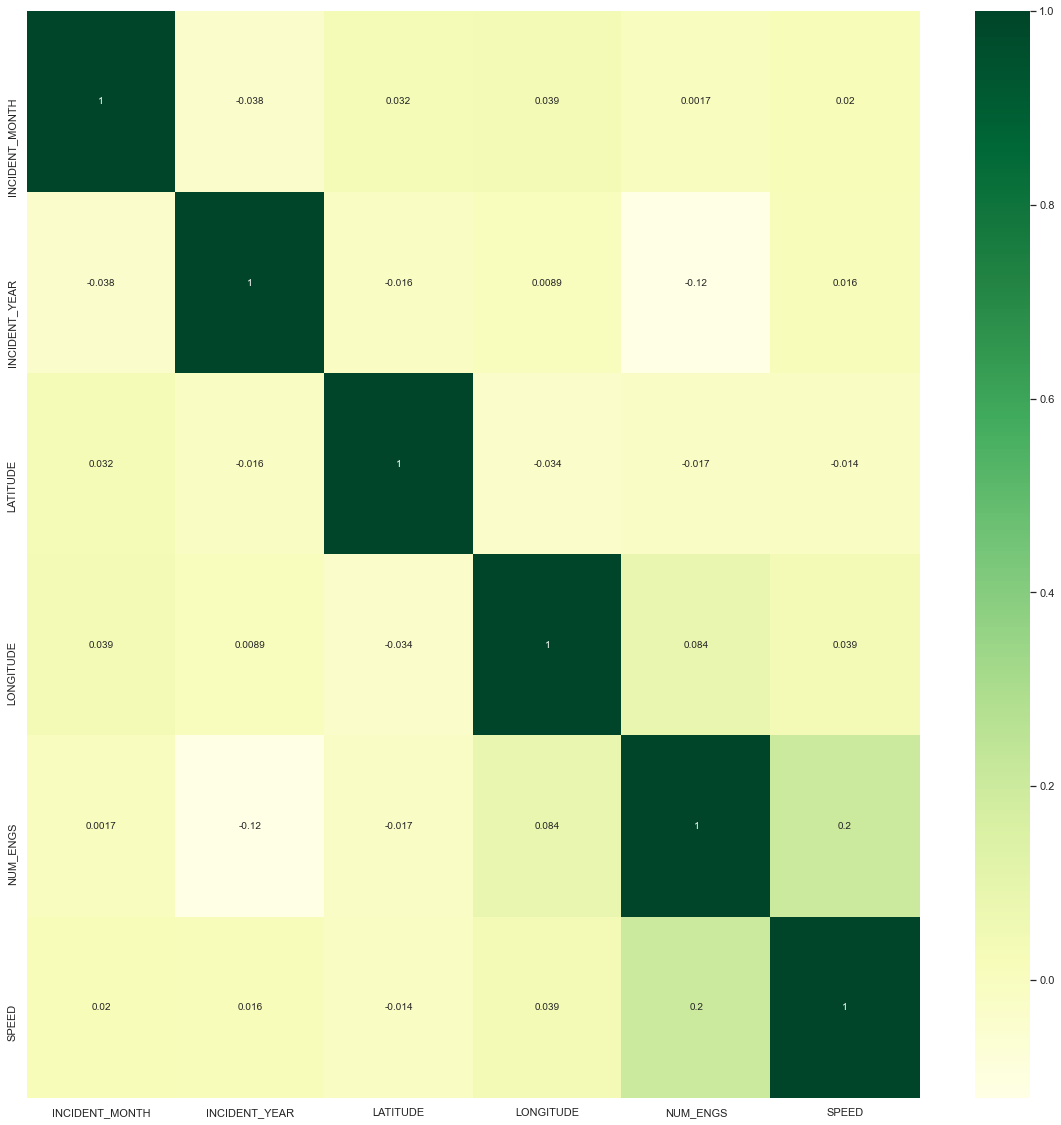

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(H, annot=True,cmap='YlGn')


#to save the chart
plt.savefig('strike_heatchart.png')

In [10]:
df2.columns

Index(['INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY', 'LATITUDE',
       'LONGITUDE', 'FAAREGION', 'NUM_ENGS', 'PHASE_OF_FLIGHT', 'SPEED', 'SKY',
       'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'EFFECT', 'SPECIES_ID', 'WARNED',
       'SIZE', 'SEASON'],
      dtype='object')

# FEATURE SELECTION

In [11]:
for i in df2.columns:
    if df2[i].dtype=='O':
        print(i,'has',len(df2[i].unique()),'categories')

TIME_OF_DAY has 4 categories
FAAREGION has 10 categories
PHASE_OF_FLIGHT has 11 categories
SKY has 3 categories
INDICATED_DAMAGE has 2 categories
DAMAGE_LEVEL has 5 categories
EFFECT has 9 categories
SPECIES_ID has 804 categories
WARNED has 3 categories
SIZE has 3 categories
SEASON has 4 categories


In [12]:
a=np.array(df2['FAAREGION'])
a=a.reshape(-1,1)

In [13]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['FAAREGION']= encoder.fit_transform(a)

In [14]:
b=np.array(df2['PHASE_OF_FLIGHT'])
b=b.reshape(-1,1)

In [15]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['PHASE_OF_FLIGHT']= encoder.fit_transform(b)

In [16]:
c=np.array(df2['SKY'])
c=c.reshape(-1,1)

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['SKY']= encoder.fit_transform(c)

In [24]:
d=np.array(df2['INDICATED_DAMAGE'])
d=d.reshape(-1,1)

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['INDICATED_DAMAGE']= encoder.fit_transform(d)

In [26]:
e=np.array(df2['DAMAGE_LEVEL'])
e=e.reshape(-1,1)

In [27]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['DAMAGE_LEVEL']= encoder.fit_transform(e)

In [28]:
f=np.array(df2['EFFECT'])
f=f.reshape(-1,1)

In [29]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['EFFECT']= encoder.fit_transform(f)

In [30]:
j=np.array(df2['WARNED'])
j=j.reshape(-1,1)

In [31]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['WARNED']= encoder.fit_transform(j)

In [32]:
k=np.array(df2['SIZE'])
k=k.reshape(-1,1)

In [33]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['SIZE']= encoder.fit_transform(k)

In [34]:
m=np.array(df2['SEASON'])
m=m.reshape(-1,1)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['SEASON']= encoder.fit_transform(m)

In [36]:
p=np.array(df2['SPECIES_ID'])
p=p.reshape(-1,1)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['SPECIES_ID']= encoder.fit_transform(p)

In [38]:
t=np.array(df2['TIME_OF_DAY'])
t=t.reshape(-1,1)

In [39]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df2['TIME_OF_DAY']= encoder.fit_transform(t)

In [40]:
df2.head()

,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,LATITUDE,LONGITUDE,FAAREGION,NUM_ENGS,PHASE_OF_FLIGHT,SPEED,SKY,INDICATED_DAMAGE,DAMAGE_LEVEL,EFFECT,SPECIES_ID,WARNED,SIZE,SEASON
0,10,1990,3.0,40.24235,-85.39586,3.0,1.0,0.0,70.0,0.0,1.0,3.0,5.0,510.0,0.0,2.0,0.0
1,8,1993,1.0,29.99339,-90.25803,7.0,3.0,6.0,140.0,0.0,1.0,3.0,5.0,509.0,1.0,1.0,2.0
2,8,1996,1.0,41.97960,-87.90446,3.0,2.0,6.0,140.0,0.0,1.0,3.0,5.0,705.0,1.0,2.0,2.0
3,9,1993,1.0,42.93452,-71.43706,4.0,1.0,0.0,150.0,0.0,0.0,4.0,8.0,508.0,0.0,0.0,0.0
4,3,1991,3.0,31.80667,-106.37781,7.0,3.0,0.0,135.0,0.0,1.0,3.0,5.0,510.0,0.0,2.0,1.0


In [41]:
X = df2.drop('INDICATED_DAMAGE', axis=1) #assign the all features to X variable.

y = df2['INDICATED_DAMAGE'] #assign the target

In [49]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X,y)

imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

imp

imp.columns=['Importance']

imp.sort_values(by='Importance',ascending=False)

,Importance
DAMAGE_LEVEL,0.309984
EFFECT,0.078723
SPECIES_ID,0.062619
NUM_ENGS,0.050951
SPEED,0.037971
TIME_OF_DAY,0.024828
WARNED,0.023967
LATITUDE,0.020968
LONGITUDE,0.019490
PHASE_OF_FLIGHT,0.017169


In [42]:
X=X[['PHASE_OF_FLIGHT','LATITUDE','LONGITUDE','SEASON','INCIDENT_MONTH','INCIDENT_YEAR','SKY','FAAREGION','TIME_OF_DAY','NUM_ENGS','WARNED']]
X

,PHASE_OF_FLIGHT,LATITUDE,LONGITUDE,SEASON,INCIDENT_MONTH,INCIDENT_YEAR,SKY,FAAREGION,TIME_OF_DAY,NUM_ENGS,WARNED
0,0.0,40.242350,-85.39586,0.0,10,1990,0.0,3.0,3.0,1.0,0.0
1,6.0,29.993390,-90.25803,2.0,8,1993,0.0,7.0,1.0,3.0,1.0
2,6.0,41.979600,-87.90446,2.0,8,1996,0.0,3.0,1.0,2.0,1.0
3,0.0,42.934520,-71.43706,0.0,9,1993,0.0,4.0,1.0,1.0,0.0
4,0.0,31.806670,-106.37781,1.0,3,1991,0.0,7.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
218578,6.0,41.979600,-87.90446,0.0,11,2021,2.0,3.0,1.0,2.0,2.0
218579,0.0,36.893485,-104.66700,0.0,11,2021,0.0,6.0,1.0,2.0,1.0
218580,9.0,30.194530,-97.66987,0.0,11,2021,1.0,7.0,1.0,2.0,2.0
218581,0.0,43.646170,-70.30875,0.0,11,2021,0.0,4.0,1.0,2.0,1.0


In [49]:
scaler = StandardScaler()

# Train - Test Split
#Split the dataset in training and test set

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) #do your data splitting

In [50]:
scaler.fit(X)

StandardScaler()

In [51]:
X_train = scaler.transform(X_train) #notice we drop away the target before applying scaling. Do not scale the target.
X_test=scaler.transform(X_test)

# Model Building

In [52]:
input_ml_algo = 'LR'

In [53]:
# Select the algorithm according to the input provided
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    return model

In [54]:
model=model_to_use('LR')
model

LogisticRegression()

In [55]:
# Training the model:
model.fit(X_train, y_train)

model

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [1. 1. 1. ... 1. 1. 1.]
Y probability predicted :  [0.9302962827163332, 0.9567809828927364, 0.8349506918262164, 0.8441709749763282, 0.8288983739482486]


In [57]:
LR=LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [1. 1. 1. ... 1. 1. 1.]
Y probability predicted :  [0.9302962827163332, 0.9567809828927364, 0.8349506918262164, 0.8441709749763282, 0.8288983739482486]


# Model Evaluation
##Get the evaluation metrics to evaluate the performance of model on testing data


 Accuracy Score : 
  0.9233091879527259

 AUC Score : 
 0.6837228669913298

 Confusion Matrix : 
  [[   16  5010]
 [   19 60530]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.46      0.00      0.01      5026
         1.0       0.92      1.00      0.96     60549

    accuracy                           0.92     65575
   macro avg       0.69      0.50      0.48     65575
weighted avg       0.89      0.92      0.89     65575


 ROC curve : 



C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


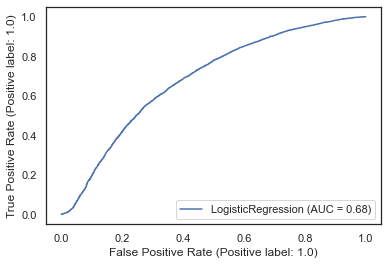

In [58]:
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 
    
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

In [ ]:
##Optimization

In [62]:
ros = RandomOverSampler()

In [64]:

X_ros, y_ros = ros.fit_resample(X, y)

y_ros.value_counts()


0.0    201925
1.0    201925
Name: INDICATED_DAMAGE, dtype: int64

In [66]:
X=X_ros
y=y_ros

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [68]:
scaler.fit(X_train)

StandardScaler()

In [69]:
X_train = scaler.transform(X_train) 
X_test=scaler.transform(X_test)

In [70]:
input_ml_algo = 'LR'

In [82]:
# Select the algorithm according to the input provided
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    return model

In [72]:
model=model_to_use('LR')
model

LogisticRegression()

In [73]:
# Training the model:
model.fit(X_train, y_train)

model

LogisticRegression()

In [76]:
y_pred =  LR.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [1. 1. 1. ... 1. 1. 1.]
Y probability predicted :  [0.3552225820482417, 0.29066071466479343, 0.5686758863778051, 0.529127032220303, 0.7199888357282798]



 Accuracy Score : 
  0.4988320746151624

 AUC Score : 
 0.6896359361916928

 Confusion Matrix : 
  [[    0 60719]
 [    0 60436]]


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U


 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     60719
         1.0       0.50      1.00      0.67     60436

    accuracy                           0.50    121155
   macro avg       0.25      0.50      0.33    121155
weighted avg       0.25      0.50      0.33    121155


 ROC curve : 



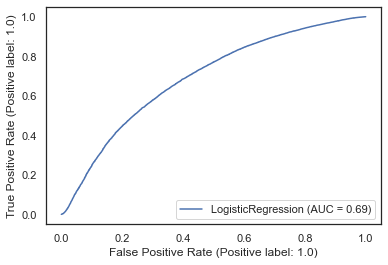

In [77]:
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 
    
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

# RERUNING THE PROCESS WITH DIFFERENT ALGORITHIM

# Decision Tree

In [84]:
input_ml_algo = 'DT'

In [85]:
model=model_to_use('DT')
model

DecisionTreeClassifier()

In [86]:
# Training the model:
model.fit(X_train, y_train)

model

DecisionTreeClassifier()

In [88]:
def classification_model(X, y):
    
    X = scaler.fit_transform(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)
    
    return model


 Accuracy Score : 
  0.927580372250423

 AUC Score : 
 0.955956157963694

 Confusion Matrix : 
  [[58815  1604]
 [ 7170 53566]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     60419
         1.0       0.97      0.88      0.92     60736

    accuracy                           0.93    121155
   macro avg       0.93      0.93      0.93    121155
weighted avg       0.93      0.93      0.93    121155


 ROC curve : 



C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


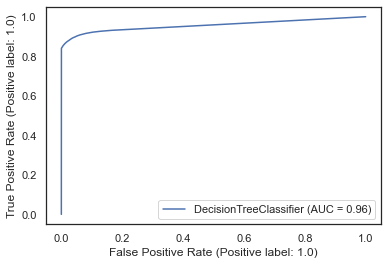

In [89]:
model= classification_model(X_ros, y_ros)

# Random Forest

In [90]:
input_ml_algo = 'RF'

In [91]:
model=model_to_use('RF')
model

RandomForestClassifier()

In [92]:
# Training the model:
model.fit(X_train, y_train)

model

RandomForestClassifier()

In [93]:
def classification_model(X, y):
    
    X = scaler.fit_transform(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)
    
    return model


 Accuracy Score : 
  0.9438322809624036

 AUC Score : 
 0.9895479900069903

 Confusion Matrix : 
  [[58723  1696]
 [ 5109 55627]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     60419
         1.0       0.97      0.92      0.94     60736

    accuracy                           0.94    121155
   macro avg       0.95      0.94      0.94    121155
weighted avg       0.95      0.94      0.94    121155


 ROC curve : 



C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


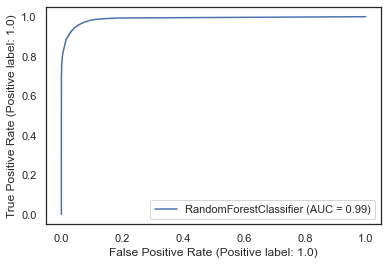

In [94]:
model= classification_model(X_ros, y_ros)

# XG-BOOST

In [95]:
input_ml_algo = 'XGBC'

In [96]:
model=model_to_use('XGBC')
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [97]:
# Training the model:
model.fit(X_train, y_train)

model

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
def classification_model(X, y):
    
    X = scaler.fit_transform(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)
    
    return model

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:49:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Accuracy Score : 
  0.7694275927530849

 AUC Score : 
 0.8546921057503231

 Confusion Matrix : 
  [[47382 13037]
 [14898 45838]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.76      0.78      0.77     60419
         1.0       0.78      0.75      0.77     60736

    accuracy                           0.77    121155
   macro avg       0.77      0.77      0.77    121155
weighted avg       0.77      0.77      0.77    121155


 ROC curve : 



C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


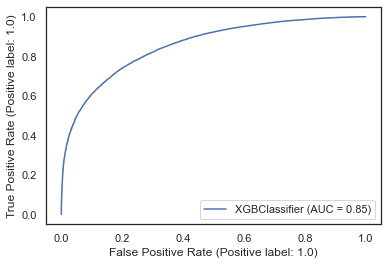

In [99]:
model= classification_model(X_ros, y_ros)

# Using random forest because of the high scores

In [111]:
input_ml_algo = 'RF'

In [112]:
model=model_to_use('RF')
model

RandomForestClassifier()

In [113]:
# Training the model:
model.fit(X_train, y_train)

model

RandomForestClassifier()

In [115]:
def classification_model(X, y):
    
    X = scaler.fit_transform(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)
    
    return model


 Accuracy Score : 
  0.9440798976517684

 AUC Score : 
 0.9895343012165956

 Confusion Matrix : 
  [[58730  1689]
 [ 5086 55650]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     60419
         1.0       0.97      0.92      0.94     60736

    accuracy                           0.94    121155
   macro avg       0.95      0.94      0.94    121155
weighted avg       0.95      0.94      0.94    121155


 ROC curve : 



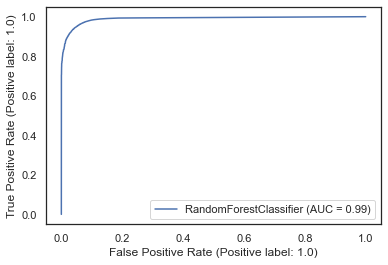

In [116]:
model= classification_model(X_ros, y_ros)

# Saving my model

In [117]:
import pickle

In [118]:
#save the model to disk
pickle.dump(model, open('strike_model.pkl', 'wb'))

pickle.dump(scaler, open('strike_scaler.pkl', 'wb'))

In [119]:
# load the model from disk
loaded_model = pickle.load(open('strike_model.pkl', 'rb'))

scaler=pickle.load(open('strike_scaler.pkl', 'rb'))

In [120]:
X=scaler.transform(X)

In [121]:
loaded_model

RandomForestClassifier()

In [122]:
#To predict with your saved model
prediction = loaded_model.predict(X)
print(prediction)

[1. 1. 1. ... 0. 0. 0.]


In [152]:
def predict(df2):
    import pandas as pd
    from sklearn.preprocessing import StandardScaler 
    df2=df2[['LONGITUDE','LATITUDE' ,'INCIDENT_YEAR','INCIDENT_MONTH','TIME_OF_DAY','NUM_ENGS', 'PHASE_OF_FLIGHT', 'SKY',
         'WARNED','SIZE', 'SEASON']]
    X=scaler.transform(df2)
    results=loaded_model.predict(X)
    results=pd.DataFrame({'Results':results})
    df2['Results']=results
    
    return df2

In [139]:
df2.columns

Index(['INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY', 'LATITUDE',
       'LONGITUDE', 'FAAREGION', 'NUM_ENGS', 'PHASE_OF_FLIGHT', 'SPEED', 'SKY',
       'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'EFFECT', 'SPECIES_ID', 'WARNED',
       'SIZE', 'SEASON'],
      dtype='object')

In [153]:
predict(df2)

,LONGITUDE,LATITUDE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,NUM_ENGS,PHASE_OF_FLIGHT,SKY,WARNED,SIZE,SEASON,Results
0,-85.39586,40.242350,1990,10,3.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
1,-90.25803,29.993390,1993,8,1.0,3.0,6.0,0.0,1.0,1.0,2.0,1.0
2,-87.90446,41.979600,1996,8,1.0,2.0,6.0,0.0,1.0,2.0,2.0,1.0
3,-71.43706,42.934520,1993,9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-106.37781,31.806670,1991,3,3.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
218578,-87.90446,41.979600,2021,11,1.0,2.0,6.0,2.0,2.0,1.0,0.0,1.0
218579,-104.66700,36.893485,2021,11,1.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0
218580,-97.66987,30.194530,2021,11,1.0,2.0,9.0,1.0,2.0,2.0,0.0,1.0
218581,-70.30875,43.646170,2021,11,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0


# Deploying the web app using STREAMLIT

In [177]:
%%writefile Birdy.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from PIL import Image


st.write("""
# BIRD STRIKE PREDICTION APP!
""")


image=Image.open('bird srike.gif')
st.image(image,caption='Howdy pilot,predict a bird strike')

model = pickle.load(open('strike_model.pkl', 'rb'))

scaler=pickle.load(open('strike_scaler.pkl', 'rb'))


st.sidebar.header('User Input Parameters')

def user_input_features():
    
    longitude=st.number_input('Longitudinal location')
    latitude=st.number_input('Latitudinal location')
    year=st.number_input('Year Of Flight',max_value=2020,min_value=1990,step=1)
    month=st.number_input('Month Of Flight',max_value=12,min_value=1,step=1) 
    time_of_day=st.sidebar.selectbox('Time of Day',('Night', 'Day','Dawn', 'Dusk'))
    Num_Engs=st.number_input('Number of Engines',max_value=4,min_value=1,step=1)
    phase_of_flight=st.sidebar.selectbox('Phase of Flight',('Approach', 'Landing Roll', 
                                        'Climb', 'En Route', 'Take-off Run',
                                        'Taxi', 'Descent', 'Parked', 'Local', 'Arrival', 'Departure',
                                        'Unknown'))                                                       
    sky=st.sidebar.selectboxb('Sky',('No Cloud','Overcast', 'Some Cloud'))
    warned=st.sidebar.selectboxb('Have You been warned before?'('Yes','No'))
    size=st.sidebar.selectbox('Size of Aircraft',('Small', 'Medium', 'Large'))
    season=st.sidebar.selectboxb('Season Of Flight',('Autumn','Summer', 'Spring', 'Winter'))
 
    if time_of_day=='Night':
        Night=1
        Day=0
        Dawn=0
        Dusk=0
    if time_of_day=='Day':
        Night=0
        Day=1
        Dawn=0
        Dusk=0
    if time_of_day=='Dawn':
        Night=0
        Day=0
        Dawn=1
        Dusk=0                                  
    if time_of_day=='Dusk':
        Night=0
        Day=0
        Dawn=0
        Dusk=1
    if phase_of_flight=='Approach':
        Approach=1
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=0                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                         
    if phase_of_flight=='Landing Roll':
        Approach=0
        Landing Roll=1
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=0                             
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0   
    if phase_of_flight=='En Route':
        Approach=0
        Landing Roll=0
        En Route=1
        Take-off Run=0
        Taxi=0
        Descent=0                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                                                
                                     
    if phase_of_flight=='Take-off Run':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=1
        Taxi=0
        Descent=0                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0  
                                     
                                     
    if phase_of_flight=='Taxi':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=1
        Descent=0                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                                    
                                     
    if phase_of_flight=='Descent':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=1                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                                    
                                                     
                                   
    if phase_of_flight=='Parked':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=0                              
        Parked=1
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                                        
    if phase_of_flight=='Local':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=0                              
        Parked=0
        Local=1
        Arrival=0
        Departure=0
        Unknown=0                                        
                                                 
    if phase_of_flight=='Arrival':
        Approach=2020
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
         Descent=0                              
        Parked=0
        Local=0
        Arrival=1
        Departure=0
        Unknown=0                                        
                                                        
    if phase_of_flight=='Departure':
        Approach=2
        Landing Roll=3
        En Route=4
        Take-off Run=5
        Taxi=6
        Descent=7                              
        Parked=8
        Local=9
        Arrival=10
        Departure=1
        Unknown=11                                        
                                               
    if phase_of_flight=='Unknown':
        Approach=2
        Landing Roll=3
        En Route=4
        Take-off Run=5
        Taxi=6
        Descent=7                              
        Parked=8
        Local=9
        Arrival=10
        Departure=11
        Unknown=1                                  
                                     
                                     
    if sky=='No Cloud':
        No Cloud=1
        Overcast=0
        Some Cloud=0
         
    if sky=='Overcast':
        No Cloud=0
        Overcast=1
        Some Cloud=0
    if sky=='Some Cloud':
        No Cloud=0
        Overcast=0
        Some Cloud=1
                                           
    if warned=='Yes':
        Yes=1
        No=0
    if warned=='No':
        Yes=0
        No=1   
                                     
    if size=='Small':
        Small=1
        Medium=0
        Large=0
                                     
    if size=='Medium':
        Small=0
        Medium=1
        Large=0 
                                     
    if size=='Large':
        Small=0
        Medium=0
        Large=1 
                   
    if season==' Autumn' :
        Autumn=1
        Summer=0
        Spring=0
        Winter=0
                                     
    if season=='Summer':
         Autumn=0
        Summer=1
        Spring=0
        Winter=0                                   
   
    if season=='Spring:
        Autumn=0
        Summer=0
        Spring=1
        Winter=0                                 
                                     
    if season=='Winter':
        Autumn=0
        Summer=0
        Spring=0
        Winter=1                                   
                                                                      
    data={'LONGITUDE':longitude,
          'LATITUDE':latitude,
          'INCIDENT_YEAR':year,
          'INCIDENT_MONTH':month,
          'TIME_OF_DAY':time_of_day,
          'NUM_ENGS':Num_Engs,
          'PHASE_OF_FLIGHT':phase_of_flight, 
          'SKY':sky,
          'WARNED':warned,
          'SIZE':size,
          'SEASON':season}
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()
input_df=scaler.transform(input_df2)


if st.button('PREDICT'):
    y_out=loaded_model.predict(input_df2)
    if y_out[0]==1:
        st.write(f' You are at a risk of a bird strike')
    else:
        st.write(f' You are not at risk of a bird strike')
    

Overwriting Birdy.py


In [182]:
%%writefile Birdy.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from PIL import Image


st.write("""
# BIRD STRIKE PREDICTION APP!
""")


image=Image.open('bird srike.gif')
st.image(image,caption='Howdy pilot,predict a bird strike')

model = pickle.load(open('strike_model.pkl', 'rb'))

scaler=pickle.load(open('strike_scaler.pkl', 'rb'))


st.sidebar.header('User Input Parameters')

def user_input_features():
    
    longitude=st.number_input('Longitudinal location')
    latitude=st.number_input('Latitudinal location')
    year=st.number_input('Year Of Flight',max_value=2020,min_value=1990,step=1)
    month=st.number_input('Month Of Flight',max_value=12,min_value=1,step=1) 
    time_of_day=st.sidebar.selectbox('Time of Day',('Night', 'Day','Dawn', 'Dusk'))
    Num_Engs=st.number_input('Number of Engines',max_value=4,min_value=1,step=1)
    phase_of_flight=st.sidebar.selectbox('Phase of Flight',('Approach', 'Landing Roll', 
                                        'Climb', 'En Route', 'Take-off Run',
                                        'Taxi', 'Descent', 'Parked', 'Local', 'Arrival', 'Departure',
                                        'Unknown'))                                                       
    sky=st.sidebar.selectboxb('Sky',('No Cloud','Overcast', 'Some Cloud'))
    warned=st.sidebar.selectboxb('Have You been warned before?'('Yes','No'))
    size=st.sidebar.selectbox('Size of Aircraft',('Small', 'Medium', 'Large'))
    season=st.sidebar.selectboxb('Season Of Flight',('Autumn','Summer', 'Spring', 'Winter'))
 
    if time_of_day=='Night':
        Night=1
        Day=0
        Dawn=0
        Dusk=0
    if time_of_day=='Day':
        Night=0
        Day=1
        Dawn=0
        Dusk=0
    if time_of_day=='Dawn':
        Night=0
        Day=0
        Dawn=1
        Dusk=0                                  
    if time_of_day=='Dusk':
        Night=0
        Day=0
        Dawn=0
        Dusk=1
    if phase_of_flight=='Approach':
        Approach=1
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=0                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                         
    if phase_of_flight=='Landing Roll':
        Approach=0
        Landing_Roll=1
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=0                             
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0   
    if phase_of_flight=='En Route':
        Approach=0
        Landing Roll=0
        En Route=1
        Take-off Run=0
        Taxi=0
        Descent=0                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                                                
                                     
    if phase_of_flight=='Take-off Run':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=1
        Taxi=0
        Descent=0                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0  
                                     
                                     
    if phase_of_flight=='Taxi':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=1
        Descent=0                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                                    
                                     
    if phase_of_flight=='Descent':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=1                              
        Parked=0
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                                    
                                                     
                                   
    if phase_of_flight=='Parked':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=0                              
        Parked=1
        Local=0
        Arrival=0
        Departure=0
        Unknown=0                                        
    if phase_of_flight=='Local':
        Approach=0
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
        Descent=0                              
        Parked=0
        Local=1
        Arrival=0
        Departure=0
        Unknown=0                                        
                                                 
    if phase_of_flight=='Arrival':
        Approach=2020
        Landing Roll=0
        En Route=0
        Take-off Run=0
        Taxi=0
         Descent=0                              
        Parked=0
        Local=0
        Arrival=1
        Departure=0
        Unknown=0                                        
                                                        
    if phase_of_flight=='Departure':
        Approach=2
        Landing Roll=3
        En Route=4
        Take-off Run=5
        Taxi=6
        Descent=7                              
        Parked=8
        Local=9
        Arrival=10
        Departure=1
        Unknown=11                                        
                                               
    if phase_of_flight=='Unknown':
        Approach=2
        Landing Roll=3
        En Route=4
        Take-off Run=5
        Taxi=6
        Descent=7                              
        Parked=8
        Local=9
        Arrival=10
        Departure=11
        Unknown=1                                  
                                     
                                     
    if sky=='No Cloud':
        No Cloud=1
        Overcast=0
        Some Cloud=0
         
    if sky=='Overcast':
        No Cloud=0
        Overcast=1
        Some Cloud=0
    if sky=='Some Cloud':
        No Cloud=0
        Overcast=0
        Some Cloud=1
                                           
    if warned=='Yes':
        Yes=1
        No=0
    if warned=='No':
        Yes=0
        No=1   
                                     
    if size=='Small':
        Small=1
        Medium=0
        Large=0
                                     
    if size=='Medium':
        Small=0
        Medium=1
        Large=0 
                                     
    if size=='Large':
        Small=0
        Medium=0
        Large=1 
                   
    if season==' Autumn' :
        Autumn=1
        Summer=0
        Spring=0
        Winter=0
                                     
    if season=='Summer':
         Autumn=0
        Summer=1
        Spring=0
        Winter=0                                   
   
    if season=='Spring:
        Autumn=0
        Summer=0
        Spring=1
        Winter=0                                 
                                     
    if season=='Winter':
        Autumn=0
        Summer=0
        Spring=0
        Winter=1                                   
                                                                      
    data={'LONGITUDE':longitude,
          'LATITUDE':latitude,
          'INCIDENT_YEAR':year,
          'INCIDENT_MONTH':month,
          'TIME_OF_DAY':time_of_day,
          'NUM_ENGS':Num_Engs,
          'PHASE_OF_FLIGHT':phase_of_flight, 
          'SKY':sky,
          'WARNED':warned,
          'SIZE':size,
          'SEASON':season}
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()
input_df=scaler.transform(input_df2)


if st.button('PREDICT'):
    y_out=loaded_model.predict(input_df2)
    if y_out[0]==1:
        st.write(f' You are at a risk of a bird strike')
    else:
        st.write(f' You are not at risk of a bird strike')
    

Overwriting Birdy.py


In [ ]:
!streamlit run Birdy.py